In [1]:
import nibabel as nib
import os
from pathlib import Path
import matplotlib.pyplot as plt

PATH = "/home/muhamed/mntdrive/zips/FDG-PET-CT-Lesions/PETCT_24cb79a92b/04-13-2003-NA-PET-CT Ganzkoerper nativ-59029"

In [2]:
pths = [os.path.join(Path(PATH), p) for p in os.listdir(PATH)]

In [5]:
nibs=[]
for pth in pths:
    try:
        nibs.append(nib.load(pth))
    except:
        continue

In [6]:
pths

['/home/muhamed/mntdrive/zips/FDG-PET-CT-Lesions/PETCT_24cb79a92b/04-13-2003-NA-PET-CT Ganzkoerper nativ-59029/CT.nii.gz',
 '/home/muhamed/mntdrive/zips/FDG-PET-CT-Lesions/PETCT_24cb79a92b/04-13-2003-NA-PET-CT Ganzkoerper nativ-59029/CTres.nii.gz',
 '/home/muhamed/mntdrive/zips/FDG-PET-CT-Lesions/PETCT_24cb79a92b/04-13-2003-NA-PET-CT Ganzkoerper nativ-59029/lesion_report.txt',
 '/home/muhamed/mntdrive/zips/FDG-PET-CT-Lesions/PETCT_24cb79a92b/04-13-2003-NA-PET-CT Ganzkoerper nativ-59029/PET.nii.gz',
 '/home/muhamed/mntdrive/zips/FDG-PET-CT-Lesions/PETCT_24cb79a92b/04-13-2003-NA-PET-CT Ganzkoerper nativ-59029/SEG.nii.gz',
 '/home/muhamed/mntdrive/zips/FDG-PET-CT-Lesions/PETCT_24cb79a92b/04-13-2003-NA-PET-CT Ganzkoerper nativ-59029/SUV.nii.gz']

Text(0.5, 1.0, 'CT')

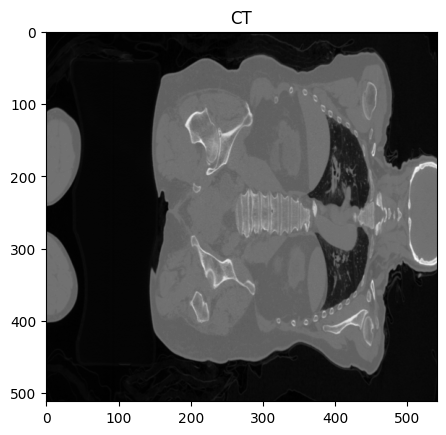

In [7]:

plt.imshow(nibs[0].get_fdata()[:, 200, :], cmap="gray")
plt.title("CT")

In [6]:
nibs[1].shape

(400, 400, 326)

In [7]:
nibs[1].affine

array([[-2.03642011e+00,  0.00000000e+00,  0.00000000e+00,
         4.06738007e+02],
       [-0.00000000e+00,  2.03642011e+00,  0.00000000e+00,
        -1.99048584e+02],
       [ 0.00000000e+00, -0.00000000e+00,  3.00000000e+00,
        -1.21950000e+03],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]])

Text(0.5, 1.0, 'CT res')

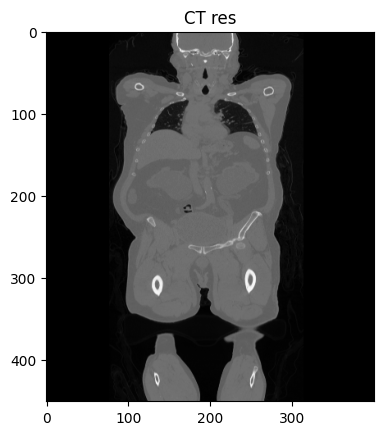

In [8]:
import numpy as np
plt.imshow(np.rot90(nibs[1].get_fdata()[:, 200, :]), cmap='gray')
plt.title("CT res")

Text(0.5, 1.0, 'PET')

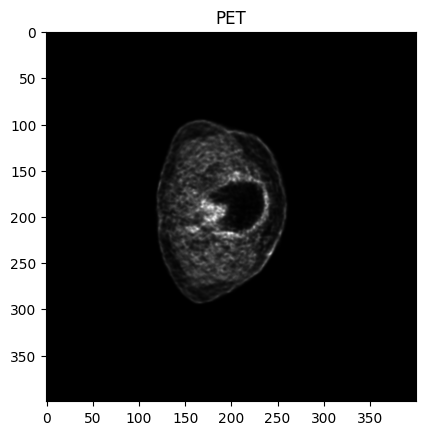

In [9]:
plt.imshow(nibs[2].get_fdata()[:, :, 200], cmap="gray")
plt.title("PET")

Text(0.5, 1.0, 'SUV')

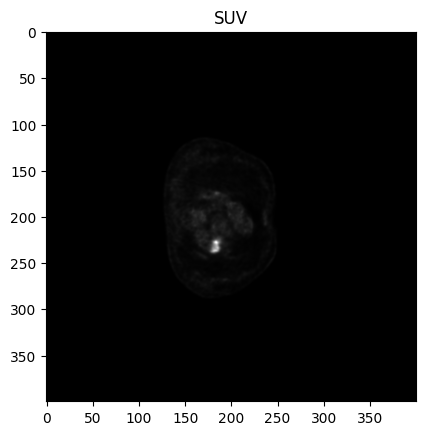

In [10]:
plt.imshow(nibs[4].get_fdata()[:, :, 200], cmap="gray")
plt.title("SUV")

In [11]:
pths

['/home/muhamed/mntdrive/zips/FDG-PET-CT-Lesions/PETCT_4d7b745a7b/01-23-2003-NA-PET-CT Ganzkoerper  primaer mit KM-29523/CT.nii.gz',
 '/home/muhamed/mntdrive/zips/FDG-PET-CT-Lesions/PETCT_4d7b745a7b/01-23-2003-NA-PET-CT Ganzkoerper  primaer mit KM-29523/CTres.nii.gz',
 '/home/muhamed/mntdrive/zips/FDG-PET-CT-Lesions/PETCT_4d7b745a7b/01-23-2003-NA-PET-CT Ganzkoerper  primaer mit KM-29523/PET.nii.gz',
 '/home/muhamed/mntdrive/zips/FDG-PET-CT-Lesions/PETCT_4d7b745a7b/01-23-2003-NA-PET-CT Ganzkoerper  primaer mit KM-29523/SEG.nii.gz',
 '/home/muhamed/mntdrive/zips/FDG-PET-CT-Lesions/PETCT_4d7b745a7b/01-23-2003-NA-PET-CT Ganzkoerper  primaer mit KM-29523/SUV.nii.gz']

In [12]:
nibs[0].get_fdata()

array([[[-1024., -1024., -1024., ..., -1024., -1024., -1024.],
        [-1024., -1024., -1024., ..., -1024., -1024., -1024.],
        [-1024., -1024., -1024., ..., -1024., -1024., -1024.],
        ...,
        [-1024., -1024., -1024., ..., -1024., -1024., -1024.],
        [-1024., -1024., -1024., ..., -1024., -1024., -1024.],
        [-1024., -1024., -1024., ..., -1024., -1024., -1024.]],

       [[-1024., -1024., -1024., ..., -1024., -1024., -1024.],
        [-1024., -1024., -1024., ..., -1024., -1024., -1024.],
        [-1024., -1024., -1024., ..., -1024., -1024., -1024.],
        ...,
        [-1024., -1024., -1024., ..., -1024., -1024., -1024.],
        [-1024., -1024., -1024., ..., -1024., -1024., -1024.],
        [-1024., -1024., -1024., ..., -1024., -1024., -1024.]],

       [[-1024., -1024., -1024., ..., -1024., -1024., -1024.],
        [-1024., -1024., -1024., ..., -1024., -1024., -1024.],
        [-1024., -1024., -1024., ..., -1024., -1024., -1024.],
        ...,
        [-10

Text(0.5, 1.0, 'mask')

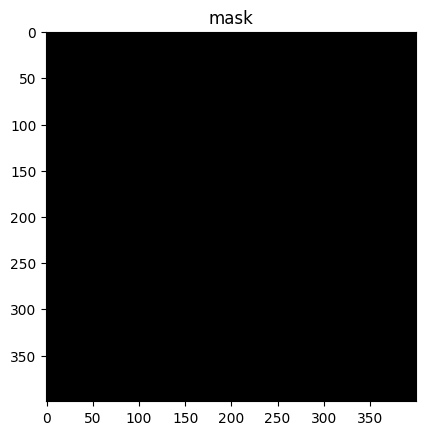

In [10]:
plt.imshow(nibs[3].get_fdata()[:, :, 200], cmap="gray")
plt.title("mask")

In [14]:
import os
import torch
import nibabel as nib
from torch.utils.data import Dataset
import numpy as np


class PETCTDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        """
        Args:
            root_dir (str): Root directory containing patients.
            transform (callable, optional): Function to apply to all volumes (pet, ct, mask).
        """
        self.root_dir = root_dir
        self.transform = transform
        self.samples = []

        for patient in os.listdir(root_dir):
            patient_path = os.path.join(root_dir, patient)
            if not os.path.isdir(patient_path):
                continue
            for study in os.listdir(patient_path):
                study_path = os.path.join(patient_path, study)
                if not os.path.isdir(study_path):
                    continue

                nii_files = [f for f in os.listdir(study_path) if f.endswith('.nii.gz')]

                pet_file = next((f for f in nii_files if 'pet' in f.lower()), None)
                ct_file = next((f for f in nii_files if 'ctres' in f.lower()), None)
                mask_file = next((f for f in nii_files if 'seg' in f.lower()), None)

                if pet_file and ct_file:
                    self.samples.append({
                        'pet_path': os.path.join(study_path, pet_file),
                        'ct_path': os.path.join(study_path, ct_file),
                        'mask_path': os.path.join(study_path, mask_file) if mask_file else None,
                    })

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        sample = self.samples[idx]

        pet_vol = nib.load(sample['pet_path']).get_fdata().astype(np.float32)
        ct_vol = nib.load(sample['ct_path']).get_fdata().astype(np.float32)

        # Normalize PET and CT
        pet_vol = (pet_vol - pet_vol.min()) / (pet_vol.ptp() + 1e-6)
        ct_vol = (ct_vol - ct_vol.min()) / (ct_vol.ptp() + 1e-6)

        # Optional: Clip extreme values if needed

        # Load mask (if exists)
        if sample['mask_path'] is not None:
            mask_vol = nib.load(sample['mask_path']).get_fdata().astype(np.float32)
        else:
            mask_vol = np.zeros_like(ct_vol, dtype=np.float32)

        # Convert to tensors with shape [1, D, H, W]
        pet_tensor = torch.from_numpy(pet_vol).unsqueeze(0)
        ct_tensor = torch.from_numpy(ct_vol).unsqueeze(0)
        mask_tensor = torch.from_numpy(mask_vol).unsqueeze(0)

        if self.transform:
            pet_tensor, ct_tensor, mask_tensor = self.transform(pet_tensor, ct_tensor, mask_tensor)

        return ct_tensor, pet_tensor, mask_tensor


In [15]:
ds = PETCTDataset(PATH)
from torch.utils.data import DataLoader
dataloader = DataLoader(ds, batch_size=1, shuffle=True)

for ct, pet, mask in dataloader:
    print(ct.shape, pet.shape, mask.shape)  # [B, 1, D, H, W]
    print(ct.min(), ct.max())
    print(mask.min(), mask.max())
    print(pet.min(), pet.max())
    break

ValueError: num_samples should be a positive integer value, but got num_samples=0

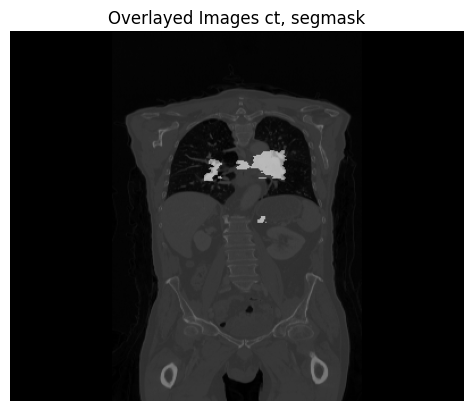

In [41]:
plt.imshow(np.rot90(nibs[1].get_fdata()[:, 180, :]), cmap='gray')  # base image
plt.imshow(np.rot90(nibs[3].get_fdata()[:, 180, :]), cmap='gray', alpha=0.5)  # overlay with transparency
plt.axis('off')
plt.title("Overlayed Images ct, segmask")
plt.show()

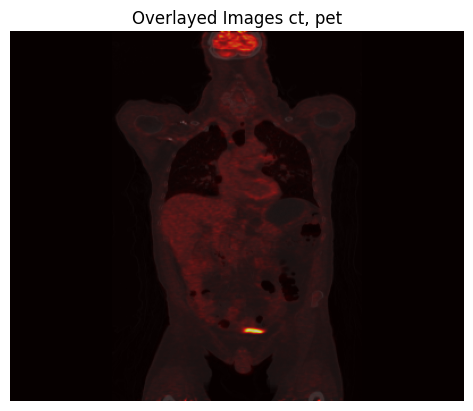

In [44]:
plt.imshow(np.rot90(nibs[1].get_fdata()[:, 200, :]), cmap='gray')  # base image
plt.imshow(np.rot90(nibs[2].get_fdata()[:, 200, :]), cmap='hot', alpha=0.7)  # overlay with transparency
plt.axis('off')
plt.title("Overlayed Images ct, pet")
plt.show()

In [85]:
import numpy as np
import nibabel as nib
from scipy.ndimage import center_of_mass

def get_weak_report(pet_img, suv_img, mask_img):
    """
    Generates a weak textual report from PET, SUV, and mask images.

    Args:
        pet_img (nib.Nifti1Image): PET image.
        suv_img (nib.Nifti1Image): SUV image.
        mask_img (nib.Nifti1Image): Segmentation mask.

    Returns:
        str: Weak textual report with lesion statistics.
    """

    # Load image data
    pet_data = pet_img.get_fdata()
    suv_data = suv_img.get_fdata()
    mask_data = mask_img.get_fdata()

    # Ensure matching shapes
    assert pet_data.shape == suv_data.shape == mask_data.shape, "Shapes do not match."

    # Tumor mask
    tumor_mask = mask_data > 0

    if not np.any(tumor_mask):
        return "No suspicious lesion detected."

    # Extract tumor voxel values
    suv_values = suv_data[tumor_mask]
    pet_values = pet_data[tumor_mask]

    # Voxel size in mm³ → convert to cm³
    voxel_volume_mm3 = np.prod(mask_img.header.get_zooms()[:3])
    volume_cm3 = np.sum(tumor_mask) * voxel_volume_mm3 / 1000

    # Center of mass (approximate lesion center)
    center = center_of_mass(tumor_mask)
    center = tuple(f"{float(c):.2f}" for c in center)

    # Prepare formatted report
    report = (
        f"Lesion detected with an estimated volume of {round(volume_cm3, 2)} cm³. "
        f"The maximum SUV is {round(np.max(suv_values), 2)}, "
        f"with a mean of {round(np.mean(suv_values), 2)} and standard deviation of {round(np.std(suv_values), 2)}. "
        f"The mean PET intensity is {round(np.mean(pet_values), 2)}. "
        f"The approximate center of the lesion is located at voxel coordinates {center}."
    )

    return report


In [94]:
import numpy as np
import nibabel as nib
from scipy.ndimage import center_of_mass

def get_approximate_location(z, total_slices):
    if z < total_slices * 0.25:
        return "pelvic region"
    elif z < total_slices * 0.5:
        return "abdominal region"
    elif z < total_slices * 0.75:
        return "thoracic (chest) region"
    else:
        return "neck/head region"


def get_statistics(pet_img, suv_img, mask_img):
    pet_data = pet_img.get_fdata()
    suv_data = suv_img.get_fdata()
    mask_data = mask_img.get_fdata()

    assert pet_data.shape == suv_data.shape == mask_data.shape, "Input images must have the same shape."

    tumor_mask = mask_data > 0
    if not np.any(tumor_mask):
        return {"message": "No suspicious lesion detected."}

    suv_values = suv_data[tumor_mask]
    pet_values = pet_data[tumor_mask]

    voxel_volume_mm3 = np.prod(mask_img.header.get_zooms()[:3])
    volume_cm3 = np.sum(tumor_mask) * voxel_volume_mm3 / 1000

    center = center_of_mass(tumor_mask)
    center_rounded = tuple(round(float(c), 2) for c in center)
    z_location = get_approximate_location(center[2], pet_data.shape[2])

    stats = {
        "volume_cm3": round(volume_cm3, 2),
        "suv_max": round(float(np.max(suv_values)), 2),
        "suv_mean": round(float(np.mean(suv_values)), 2),
        "suv_std": round(float(np.std(suv_values)), 2),
        "location": z_location
    }

    return stats


In [97]:
stats = get_statistics(nibs[2], nibs[4], nibs[3])

if "message" in stats:
    print(stats["message"])
else:
    report = (
        f"Lesion detected in the {stats['location']} with an estimated volume of {stats['volume_cm3']} cm³. "
        f"The maximum SUV is {stats['suv_max']}, with a mean of {stats['suv_mean']} and a standard deviation of {stats['suv_std']}. "
    )
    print(report)


Lesion detected in the thoracic (chest) region with an estimated volume of 231.23 cm³. The maximum SUV is 23.96, with a mean of 5.17 and a standard deviation of 4.78. 
